## Name: Pulkit Jain

## Internship: Data Science And Business Analytics

## Organisation: The Spark Foundation 

# <center>Task 1 :Prediction Using Supervised ML</center>

### <center>Predicting the marks scored by a student based on the Number of Hours Studied</center>

## Step 1: Importing the required libraries and dataset

### Starting by importing relevant libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [3]:
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 2: Visual Presentation of the data imported

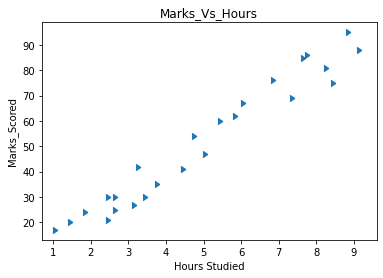

Data Plotted Successfully


In [4]:
plt.scatter(x='Hours',y='Scores',data=student_data,marker=5)
plt.xlabel("Hours Studied")
plt.ylabel("Marks_Scored")
plt.title("Marks_Vs_Hours")
plt.show()
print('Data Plotted Successfully')

### We can clearly see from the diagram that there is a high degree of positive correlation between the no. of hours studied and the marks scored. Now, we will explain this relation numerically using appropriate function of Python. 

In [5]:
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### There exists a high positive correlation of 0.976191 between the variables- no. of Hours Studied and Marks Scored. 

## Step 3: Distinguishing the data.

### Now we will the distinguish the data between independent(No. of Hours Studied) and dependent(Percentage of Marks Scored).

In [6]:
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
X = student_data.iloc[:,:-1].values # Dependent Variable
y = student_data.iloc[:,1].values #Independent Variable

### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### In the above model we will divide the data in 2:1 ratio where 67% of the data will be used for training the model and the remaining 33% of data will be used for testing purposes

## Step 4: Training the Algorithm

### In order to train the model, we will import the Linear Regression Model from scikit-learn library.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm=LinearRegression()

In [12]:
lm.fit(X_train, y_train)
print('Training Complete')

Training Complete


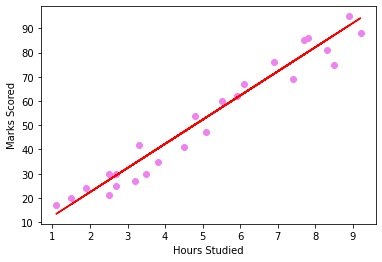

Regression line Plotted


In [13]:
line = lm.coef_*X+lm.intercept_

plt.scatter(X, y,color='violet' )
plt.plot(X, line,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.show()
print('Regression line Plotted')

## Step 5: Testing the Algorithm

### After training the model with the training data, we will make the predictions based on the testing the data and check how accurately it predicts.

In [14]:
print(X_test)
y_pred = lm.predict(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]
 [5.1]]


In [15]:
lm.coef_

array([9.98187468])

In [16]:
lm.intercept_

2.3995015535991797

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,27.354188
1,85,79.259937
2,35,40.330625
3,69,76.265374
4,60,57.299812
5,54,50.312500
6,27,34.341501
7,75,87.245436
8,47,53.307062


### Predicting the marks scored based on hours studied

In [18]:
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.73184230968408


## Step 6: Evaluating the Algorithm 

### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.918173514011159
